In [4]:
import quandl
import pandas as pd
from path import Path
import seaborn as sns
import os
import matplotlib.pyplot as plt

from datetime import date, timedelta


In [5]:
file_path = Path("../data/cleandata/VLO_Daily.csv")
VLO = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
VLO.rename(columns={"Adj Close": "VLO"}, inplace=True)

In [6]:

#yesterday = date.today() - timedelta(days=1)
#yesterday.strftime('%Y-%m-%d')


In [7]:
start = '2017-01-01'
end = '2019-06-30'

In [54]:
#USE YOUR API KEY
quandl.ApiConfig.api_key = 'DKz2PtZF4s2ArXG4caAt'

In [8]:
#Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)
#Crude1 = quandl.get("CHRIS/CME_CL1", authtoken="DKz2PtZF4s2ArXG4caAt")

Crude1=quandl.get('CHRIS/CME_CL1', start_date=start, end_date=end)
WTI_Midland=quandl.get('CHRIS/CME_AFF1', start_date=start, end_date=end)
Brent = quandl.get("CHRIS/ICE_B1", start_date=start, end_date=end)
RBOB = quandl.get("CHRIS/CME_RB1", start_date=start, end_date=end)
Ethanol = quandl.get("CHRIS/CME_EH1", start_date=start, end_date=end)
Corn = quandl.get("CHRIS/CME_C1", start_date=start, end_date=end)
CAD_Heavy = quandl.get("CHRIS/CME_WCC1", start_date=start, end_date=end)
VIX = quandl.get("CHRIS/CBOE_VX1", start_date=start, end_date=end)
ULSD = quandl.get("CHRIS/CME_HO1",start_date=start, end_date=end)
OPEC_Basket = quandl.get("OPEC/ORB", start_date=start, end_date=end)
RBOB_Crack = quandl.get("CHRIS/CME_RM1", start_date=start, end_date=end)
GC_ULSD_Crack = quandl.get("CHRIS/CME_GY1", start_date=start, end_date=end)
NY_ULSD_Crack = quandl.get("CHRIS/CME_HK1", start_date=start, end_date=end)
NG_HB = quandl.get("CHRIS/CME_NG1", start_date=start, end_date=end)
S_P = quandl.get("CHRIS/CME_SP1", start_date=start, end_date=end)


In [9]:
dfs = [Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,
     RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P, VLO]


In [10]:
columns = ['Crude1','WTI_Midland','Brent','RBOB','Ethanol','Corn','CAD_Heavy','VIX','ULSD','OPEC_Basket',
     'RBOB_Crack','GC_ULSD_Crack','NY_ULSD_Crack','NG_HB','S_P','VLO']

In [11]:
Crude1.rename(columns={"Settle": "Crude1"}, inplace=True)
WTI_Midland.rename(columns={"Settle": "WTI_Midland"}, inplace=True)
Brent.rename(columns={"Settle": "Brent"}, inplace=True)
RBOB.rename(columns={"Settle": "RBOB"}, inplace=True)
Ethanol.rename(columns={"Settle": "Ethanol"}, inplace=True)
Corn.rename(columns={"Settle": "Corn"}, inplace=True)
CAD_Heavy.rename(columns={"Settle": "CAD_Heavy"}, inplace=True)
VIX.rename(columns={"Settle": "VIX"}, inplace=True)
ULSD.rename(columns={"Settle": "ULSD"}, inplace=True)
OPEC_Basket.rename(columns={"Value": "OPEC_Basket"}, inplace=True) 
RBOB_Crack.rename(columns={"Settle": "RBOB_Crack"}, inplace=True)
GC_ULSD_Crack.rename(columns={"Settle": "GC_ULSD_Crack"}, inplace=True)
NY_ULSD_Crack.rename(columns={"Settle": "NY_ULSD_Crack"}, inplace=True)
NG_HB.rename(columns={"Settle": "NG_HB"}, inplace=True)
S_P.rename(columns={"Settle": "S_P"}, inplace=True)

In [12]:
concat = pd.concat(dfs, axis=1, join='inner')

In [13]:
df = concat[columns]


In [14]:
df = df.reset_index()
df = df.rename(columns={"index":"Date"})
df.head()

,Date,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO
0,2017-01-05,53.76,-0.06,56.89,1.6377,1.507,361.25,-15.044,13.025,1.6942,53.02,21.45,14.58,17.13,3.273,2264.3,60.913052
1,2017-01-06,53.99,-0.11,57.10,1.6340,1.551,358.00,-14.459,12.875,1.7032,53.50,21.45,14.69,17.27,3.285,2271.5,59.995037
2,2017-01-09,51.96,-0.22,54.94,1.5707,1.524,360.00,-14.296,12.925,1.6376,52.85,20.94,14.27,16.68,3.103,2265.0,59.734032
3,2017-01-10,50.82,-0.17,53.64,1.5467,1.503,358.25,-14.193,12.875,1.6114,51.46,21.15,14.44,16.72,3.278,2263.7,59.878029
4,2017-01-11,52.25,-0.17,55.10,1.5929,1.492,357.25,-14.232,12.525,1.6524,50.98,21.64,14.67,16.96,3.224,2270.6,60.373043


In [15]:
correlation = df.corr()
correlation['VLO'].sort_values()

WTI_Midland     -0.757277
CAD_Heavy       -0.573175
Ethanol         -0.474131
NG_HB           -0.197571
RBOB_Crack      -0.016568
Corn             0.042483
VIX              0.209882
NY_ULSD_Crack    0.450836
GC_ULSD_Crack    0.467905
S_P              0.788918
RBOB             0.801304
ULSD             0.904561
OPEC_Basket      0.912794
Crude1           0.915892
Brent            0.926579
VLO              1.000000
Name: VLO, dtype: float64

<AxesSubplot:>

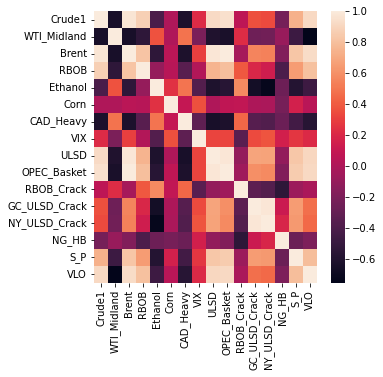

In [16]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation)

In [63]:
#save to csv
df.to_csv(r'../data/cleandata/Data.csv',index=False)
